# PEER GRADED ASSIGNMENT 

1. Brief description of the data set and a summary of its attributes

In [251]:
import pandas as pd , numpy as np , matplotlib.pyplot as plt 
data = pd.read_csv('dataset_Facebook.csv',sep=';')
copy_data = data.copy()
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


`Above is the facebook page post details of a cosmetic company which was uploaded by the company as part of social media advertising . The effect of the post on lifetime engaged user with the company is also noted with several other variables values `

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [253]:
# Ch ecking dimensions of data
print('Number of rows and columns are ',data.shape)

#Checking data types 
print('\nData types of columns are\n', data.dtypes)

Number of rows and columns are  (500, 19)

Data types of columns are
 Page total likes                                                         int64
Type                                                                    object
Category                                                                 int64
Post Month                                                               int64
Post Weekday                                                             int64
Post Hour                                                                int64
Paid                                                                   float64
Lifetime Post Total Reach                                                int64
Lifetime Post Total Impressions                                          int64
Lifetime Engaged Users                                                   int64
Lifetime Post Consumers                                                  int64
Lifetime Post Consumptions                                   

In [254]:
#Checking Unique in value is each columns 
data.nunique() 

Page total likes                                                        90
Type                                                                     4
Category                                                                 3
Post Month                                                              12
Post Weekday                                                             7
Post Hour                                                               22
Paid                                                                     2
Lifetime Post Total Reach                                              485
Lifetime Post Total Impressions                                        494
Lifetime Engaged Users                                                 414
Lifetime Post Consumers                                                422
Lifetime Post Consumptions                                             440
Lifetime Post Impressions by people who have liked your Page           491
Lifetime Post reach by pe

2. Initial plan for data exploration

 - From above it is clear that Type ,Category ,Post Month, Post Weekday , Post Hour , Paid are categorical variable 

In [255]:
cat_col = ['Type' ,'Category','Post Month' ,'Post Weekday' ,'Post Hour' ,'Paid' ]
print(data[cat_col].columns)
print(data.drop(columns = cat_col).columns)

Index(['Type', 'Category', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid'], dtype='object')
Index(['Page total likes', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')


In [256]:
data[cat_col]

,Type,Category,Post Month,Post Weekday,Post Hour,Paid
0,Photo,2,12,4,3,0.0
1,Status,2,12,3,10,0.0
2,Photo,3,12,3,3,0.0
3,Photo,2,12,2,10,1.0
4,Photo,2,12,2,3,0.0
...,...,...,...,...,...,...
495,Photo,3,1,7,2,0.0
496,Photo,2,1,5,8,0.0
497,Photo,1,1,5,2,0.0
498,Photo,3,1,4,11,0.0


3. Actions taken for data cleaning and feature engineering

- In categorical data , all column are numerical except type variable . We will first convert categorical column in dummy variable as they are also  in ordinal form

In [257]:
data_tr  =pd.DataFrame(pd.get_dummies(data , columns = cat_col ,drop_first =True))
data_tr.head().T

,0,1,2,3,4
Page total likes,139441.0,139441.0,139441.0,139441.0,139441.0
Lifetime Post Total Reach,2752.0,10460.0,2413.0,50128.0,7244.0
Lifetime Post Total Impressions,5091.0,19057.0,4373.0,87991.0,13594.0
Lifetime Engaged Users,178.0,1457.0,177.0,2211.0,671.0
Lifetime Post Consumers,109.0,1361.0,113.0,790.0,410.0
Lifetime Post Consumptions,159.0,1674.0,154.0,1119.0,580.0
Lifetime Post Impressions by people who have liked your Page,3078.0,11710.0,2812.0,61027.0,6228.0
Lifetime Post reach by people who like your Page,1640.0,6112.0,1503.0,32048.0,3200.0
Lifetime People who have liked your Page and engaged with your post,119.0,1108.0,132.0,1386.0,396.0
comment,4.0,5.0,0.0,58.0,19.0


- Now we will look at some values which are highly skewed 

In [258]:
data_tr.dtypes

Page total likes                                                         int64
Lifetime Post Total Reach                                                int64
Lifetime Post Total Impressions                                          int64
Lifetime Engaged Users                                                   int64
Lifetime Post Consumers                                                  int64
Lifetime Post Consumptions                                               int64
Lifetime Post Impressions by people who have liked your Page             int64
Lifetime Post reach by people who like your Page                         int64
Lifetime People who have liked your Page and engaged with your post      int64
comment                                                                  int64
like                                                                   float64
share                                                                  float64
Total Interactions                                  

4. Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

In [259]:
skew_vals = pd.concat([data_tr[data_tr.columns[data_tr.dtypes==np.int64]] ,
           data_tr[data_tr.columns[data_tr.dtypes==np.float]] ] ,axis = 1).skew()
skew_limit = 0.75
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
Lifetime Post Impressions by people who have liked your Page,14.723360
share,12.161379
comment,11.767564
Total Interactions,9.712906
like,8.955313
Lifetime Post Total Impressions,8.351008
Lifetime Post Consumers,5.033075
Lifetime Post Consumptions,4.817636
Lifetime Engaged Users,4.515920
Lifetime Post Total Reach,3.679156


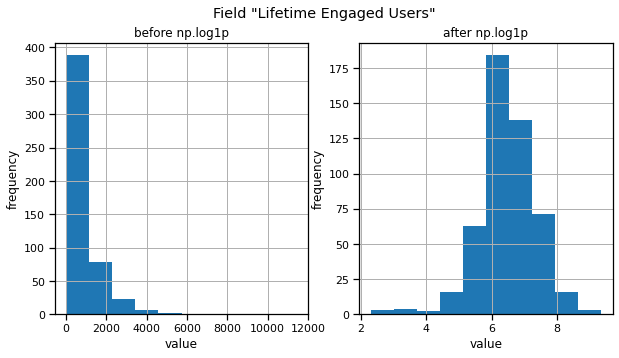

In [260]:

# Choose a field
field = "Lifetime Engaged Users"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
data_tr[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
data_tr[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [261]:
skew_cols.index.values

array(['Lifetime Post Impressions by people who have liked your Page',
       'share', 'comment', 'Total Interactions', 'like',
       'Lifetime Post Total Impressions', 'Lifetime Post Consumers',
       'Lifetime Post Consumptions', 'Lifetime Engaged Users',
       'Lifetime Post Total Reach',
       'Lifetime People who have liked your Page and engaged with your post',
       'Lifetime Post reach by people who like your Page',
       'Page total likes'], dtype=object)

In [262]:
# We now have a larger set of potentially-useful features
data_tr.shape

(500, 57)

In [263]:
# Checking for missing observation and if presetn filling in with 0
data_tr = data_tr.fillna(0)

In [264]:
np.sum(data_tr.isnull().sum()) # This indicate we have no NA or NAN  values in the dataset 

0

5. Formulating at least 3 hypothesis about this data

# Let us set up some Hypothesis . Below are some of the hypothesis we can test 

## Hypothesis 1
- HO1(Null) : 'Lifetime Engaged_Uset' is normal distributed  
- H11(Alternate) :'Lifetime Engaged USer' is not normal distributed

## Hypothesis 2
- HO2(Null) :Mean value of number Post in Month 9 and 10 are equal 
- H12(Alternate) :Mean value of number of post in Month 9 and 10 are not equal 


## Hypothesis 3
- HO3(Null) : Variance  of number Post in Month 9 and 10 are equal 
- H13(Alternate) : Variance  of number Post in Month 9 and 10 are equal 


- Conducting a formal significance test for one of the hypotheses and discuss the results

In [265]:
# Testing our first hypothesis we can use D’Agostino’s K-squared test
from scipy.stats import normaltest
stat ,p = normaltest(data_tr['Lifetime Engaged Users'])
if ( p <0.05):
    print("Lifetime engaged user is not normally distributed")
else :
    print("Lifetime engaged user is  normally distributed")

Lifetime engaged user is not normally distributed


6. Suggestions for next steps in analyzing this data and a paragraph that summarizes the quality of this data set and a request for additional data if needed

# SUMMARY 

- We have checked the data has 500 and rows and 19 columns regarding the facebook post of cosmetic brand facebook page
- The data has 6 categorical column which has both ordinal and unordered column 
- 13 column are quantitative column but there scale of measurement differ a lot 
- We have handled categorical column by converting them to dummy variable
- Also our interest is to see number of Lifetime Engaged User with the company which we found that is highly negative skewed . 
- We have filled the missing observation to 0 as there are only 4 missing observation in all 
- We have confirmed by the statistical test the variable Lifetime Engaged User is Not normally distributed 
- Further Analysis can be done by Using dimensionality reduction as feature space has increased a lot . 